In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargar archivo csv
data = pd.read_csv('Amterdam_Sin_Nulos.csv')

# Eliminar la columna 'Unnamed'
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])
data.to_csv('Amterdam_Sin_Nulos.csv', index=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9659 non-null   int64  
 1   scrape_id                                     9659 non-null   int64  
 2   last_scraped                                  9659 non-null   object 
 3   name                                          9659 non-null   object 
 4   host_id                                       9659 non-null   int64  
 5   host_name                                     9659 non-null   object 
 6   host_since                                    9659 non-null   object 
 7   host_response_time                            9659 non-null   object 
 8   host_response_rate                            9659 non-null   object 
 9   host_acceptance_rate                          9659 non-null   o

In [3]:
# Identificar valores nulos por dataframe
valores_nulos = data.isnull().sum()
valores_nulos

id                                              0
scrape_id                                       0
last_scraped                                    0
name                                            0
host_id                                         0
host_name                                       0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_identity_verified                          0
neighbourhood                                   0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0


In [4]:
# Crear 2 dataframe para poder procesar los outliers

cuantitativas = data.iloc[:, [ 0, 1, 4, 11, 12, 15, 16, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49]]
cualitativas = data.iloc[:, [ 2, 3, 5, 6, 7, 8, 9, 10, 13, 14, 17, 18, 23, 30, 35, 36, 44, 45, 50]]


In [6]:
cuantitativas

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6624170,20240905174946,34670170,1,2,52.368420,4.924380,3,1.0,1.0,...,4.83,4.86,4.83,4.86,4.56,4.65,1,1,0,0
1,8837071,20240905174946,13034277,1,1,52.364550,4.877120,2,1.0,1.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1,1,0,0
2,716107,20240905174946,3689867,1,1,52.364620,4.868240,2,1.0,1.0,...,4.82,4.64,4.78,4.83,4.66,4.61,1,1,0,0
3,664538756986273255,20240905174946,7647768,1,4,52.393940,4.905870,3,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,1,1,0,0
4,8191077,20240905174946,43205475,1,1,52.360470,4.901240,6,1.0,1.0,...,4.65,4.56,4.86,4.79,4.83,4.45,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,966541170992774199,20240905174946,246243877,1,2,52.355003,4.794973,3,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1,1,0,0
9655,1071580910909485585,20240905174946,10528290,1,3,52.355563,4.915865,3,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1,1,0,0
9656,917770101011925774,20240905174946,8325013,1,1,52.385019,4.874311,4,2.0,2.0,...,5.00,5.00,5.00,5.00,5.00,4.83,1,1,0,0
9657,1213897347496953929,20240905174946,154774784,1,1,52.351830,4.904940,4,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1,1,0,0


<Figure size 1500x800 with 0 Axes>

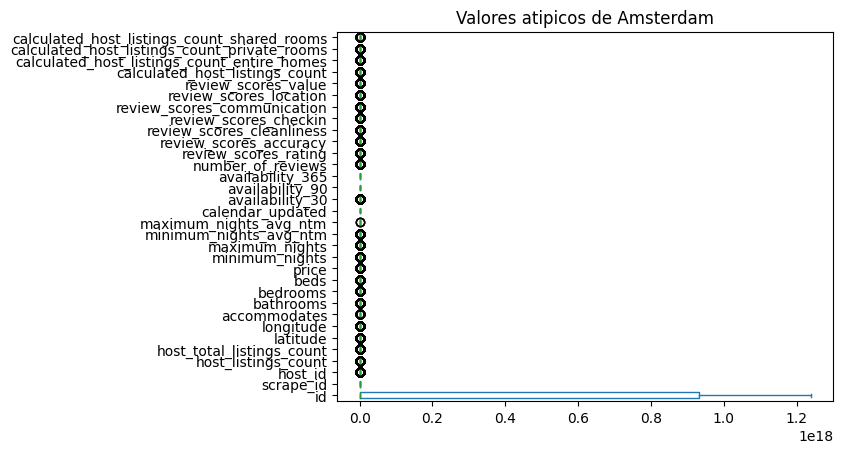

In [7]:
# Realizamos diagrama de caja o bigote 
fig = plt.figure(figsize = (15,8))
cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos de Amsterdam")
plt.show()

PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME 

In [5]:
# Método aplicando desviación estándar (encontrar valores extremos )
y = cuantitativas
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()

print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_inferior)

Limite superior permitido id                                              1.909701e+18
scrape_id                                       2.024091e+13
host_id                                         6.038350e+08
host_listings_count                             9.643925e+01
host_total_listings_count                       1.582157e+02
latitude                                        5.241858e+01
longitude                                       4.996410e+00
accommodates                                    7.003926e+00
bathrooms                                       2.482329e+00
bedrooms                                        4.275631e+00
beds                                            5.459127e+00
price                                           3.134979e+03
minimum_nights                                  6.375050e+01
maximum_nights                                  1.573129e+03
minimum_nights_avg_ntm                          6.255134e+01
maximum_nights_avg_ntm                          9.271540e+0

In [6]:
# Obtenemos datos y los outliers se convierten en nulos en el dataframe
data1 = cuantitativas[( y <= limite_superior) & (y >= limite_inferior)]
data1

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6624170,20240905174946,34670170,1.0,2.0,52.368420,4.924380,3.0,1.0,1.0,...,4.83,4.86,4.83,4.86,4.56,4.65,1.0,1.0,0.0,0.0
1,8837071,20240905174946,13034277,1.0,1.0,52.364550,4.877120,2.0,1.0,1.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
2,716107,20240905174946,3689867,1.0,1.0,52.364620,4.868240,2.0,1.0,1.0,...,4.82,4.64,4.78,4.83,4.66,4.61,1.0,1.0,0.0,0.0
3,664538756986273255,20240905174946,7647768,1.0,4.0,52.393940,4.905870,3.0,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0
4,8191077,20240905174946,43205475,1.0,1.0,52.360470,4.901240,6.0,1.0,1.0,...,4.65,4.56,4.86,4.79,4.83,4.45,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,966541170992774199,20240905174946,246243877,1.0,2.0,52.355003,4.794973,3.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9655,1071580910909485585,20240905174946,10528290,1.0,3.0,52.355563,4.915865,3.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9656,917770101011925774,20240905174946,8325013,1.0,1.0,52.385019,4.874311,4.0,2.0,2.0,...,5.00,5.00,5.00,5.00,5.00,4.83,1.0,1.0,0.0,0.0
9657,1213897347496953929,20240905174946,154774784,1.0,1.0,52.351830,4.904940,4.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0


In [7]:
#Corroboramos valores nulos del dataframe
valores_nulos = data1.isnull().sum()
valores_nulos

id                                                0
scrape_id                                         0
host_id                                           0
host_listings_count                              19
host_total_listings_count                        24
latitude                                        135
longitude                                       121
accommodates                                     79
bathrooms                                       232
bedrooms                                         70
beds                                            106
price                                             4
minimum_nights                                   36
maximum_nights                                    0
minimum_nights_avg_ntm                           34
maximum_nights_avg_ntm                            2
calendar_updated                                  0
availability_30                                 217
availability_90                                   0
availability

In [8]:
# Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
# Realizamos una copia del dataframe
data_clean = data1.copy()
data_clean = data_clean.fillna(round(data1.mean(),1))
data_clean

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6624170,20240905174946,34670170,1.0,2.0,52.368420,4.924380,3.0,1.0,1.0,...,4.83,4.86,4.83,4.86,4.56,4.65,1.0,1.0,0.0,0.0
1,8837071,20240905174946,13034277,1.0,1.0,52.364550,4.877120,2.0,1.0,1.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
2,716107,20240905174946,3689867,1.0,1.0,52.364620,4.868240,2.0,1.0,1.0,...,4.82,4.64,4.78,4.83,4.66,4.61,1.0,1.0,0.0,0.0
3,664538756986273255,20240905174946,7647768,1.0,4.0,52.393940,4.905870,3.0,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0
4,8191077,20240905174946,43205475,1.0,1.0,52.360470,4.901240,6.0,1.0,1.0,...,4.65,4.56,4.86,4.79,4.83,4.45,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,966541170992774199,20240905174946,246243877,1.0,2.0,52.355003,4.794973,3.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9655,1071580910909485585,20240905174946,10528290,1.0,3.0,52.355563,4.915865,3.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9656,917770101011925774,20240905174946,8325013,1.0,1.0,52.385019,4.874311,4.0,2.0,2.0,...,5.00,5.00,5.00,5.00,5.00,4.83,1.0,1.0,0.0,0.0
9657,1213897347496953929,20240905174946,154774784,1.0,1.0,52.351830,4.904940,4.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0


In [9]:
# Corroboramos valores nulos del dataframe limpio
valores_nulos = data_clean.isnull().sum()
valores_nulos

id                                              0
scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
calendar_updated                                0
availability_30                                 0
availability_90                                 0
availability_365                                0


In [10]:
data_clean.to_csv("Amsterdam_DesviacionEstandar.csv")

PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME

In [13]:
# Método aplicando cuartiles (0.25 y 0.75)
y = cuantitativas

porcentile25 = y.quantile(0.25) 
porcentile75 = y.quantile(0.75)

iqr = porcentile75 - porcentile25

#Q1
limite_superior_iqr = porcentile75 + 1.5*iqr

#Q2
limite_inferior_iqr = porcentile25 - 1.5*iqr

print("Limite superior permitido", limite_superior_iqr)
print("Limite inferior permitido", limite_inferior_iqr)

Limite superior permitido id                                              2.332510e+18
scrape_id                                       2.024091e+13
host_id                                         4.051727e+08
host_listings_count                             1.000000e+00
host_total_listings_count                       3.500000e+00
latitude                                        5.240760e+01
longitude                                       4.975960e+00
accommodates                                    7.000000e+00
bathrooms                                       1.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           4.240000e+02
minimum_nights                                  7.000000e+00
maximum_nights                                  8.825000e+02
minimum_nights_avg_ntm                          7.000000e+00
maximum_nights_avg_ntm                          2.781000e+0

In [14]:
data1_iqr = cuantitativas[( y <= limite_superior_iqr) & (y >= limite_inferior_iqr)]
data1_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6624170,20240905174946,34670170.0,1.0,2.0,52.368420,4.924380,3.0,1.0,1.0,...,4.83,4.86,4.83,4.86,4.56,4.65,1.0,1.0,0.0,0.0
1,8837071,20240905174946,13034277.0,1.0,1.0,52.364550,4.877120,2.0,1.0,1.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
2,716107,20240905174946,3689867.0,1.0,1.0,52.364620,4.868240,2.0,1.0,1.0,...,4.82,4.64,4.78,4.83,4.66,4.61,1.0,1.0,0.0,0.0
3,664538756986273255,20240905174946,7647768.0,1.0,NaN,52.393940,4.905870,3.0,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0
4,8191077,20240905174946,43205475.0,1.0,1.0,52.360470,4.901240,6.0,1.0,1.0,...,4.65,4.56,4.86,4.79,4.83,4.45,1.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,966541170992774199,20240905174946,246243877.0,1.0,2.0,52.355003,NaN,3.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9655,1071580910909485585,20240905174946,10528290.0,1.0,3.0,52.355563,4.915865,3.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9656,917770101011925774,20240905174946,8325013.0,1.0,1.0,52.385019,4.874311,4.0,NaN,2.0,...,5.00,5.00,5.00,5.00,5.00,4.83,1.0,1.0,0.0,0.0
9657,1213897347496953929,20240905174946,154774784.0,1.0,1.0,52.351830,4.904940,4.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0


In [15]:
valores_nulos = data1_iqr.isnull().sum()
valores_nulos

id                                                 0
scrape_id                                          0
host_id                                         1037
host_listings_count                             2241
host_total_listings_count                       1536
latitude                                         378
longitude                                        353
accommodates                                      79
bathrooms                                       2071
bedrooms                                         354
beds                                             525
price                                            775
minimum_nights                                   380
maximum_nights                                  1811
minimum_nights_avg_ntm                           447
maximum_nights_avg_ntm                             3
calendar_updated                                   0
availability_30                                 1015
availability_90                               

In [16]:
# Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
# Realizamos una copia del dataframe
data3_iqr = data1_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data1_iqr.mean(),1))
data3_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6624170,20240905174946,34670170.0,1.0,2.0,52.368420,4.924380,3.0,1.0,1.0,...,4.83,4.86,4.83,4.86,4.56,4.65,1.0,1.0,0.0,0.0
1,8837071,20240905174946,13034277.0,1.0,1.0,52.364550,4.877120,2.0,1.0,1.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
2,716107,20240905174946,3689867.0,1.0,1.0,52.364620,4.868240,2.0,1.0,1.0,...,4.82,4.64,4.78,4.83,4.66,4.61,1.0,1.0,0.0,0.0
3,664538756986273255,20240905174946,7647768.0,1.0,1.4,52.393940,4.905870,3.0,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0
4,8191077,20240905174946,43205475.0,1.0,1.0,52.360470,4.901240,6.0,1.0,1.0,...,4.65,4.56,4.86,4.79,4.83,4.45,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,966541170992774199,20240905174946,246243877.0,1.0,2.0,52.355003,4.900000,3.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9655,1071580910909485585,20240905174946,10528290.0,1.0,3.0,52.355563,4.915865,3.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9656,917770101011925774,20240905174946,8325013.0,1.0,1.0,52.385019,4.874311,4.0,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,4.83,1.0,1.0,0.0,0.0
9657,1213897347496953929,20240905174946,154774784.0,1.0,1.0,52.351830,4.904940,4.0,1.0,2.0,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0


In [17]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo 

datos_limpios = pd.concat([cualitativas, data3_iqr], axis = 1)
datos_limpios

,last_scraped,name,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2024-09-05,"Warm, cozy sunlighted downtown appt",Jeroen,2015-05-31,undefined time,0%,0%,f,t,undefined,...,4.83,4.86,4.83,4.86,4.56,4.65,1.0,1.0,0.0,0.0
1,2024-09-05,Cozy apartment in city center,Theo,2014-03-11,undefined time,0%,0%,f,f,"Amsterdam, Noord-Holland, Netherlands",...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
2,2024-09-05,Loft style home nearby city centre,Marijke,2012-09-27,within an hour,100%,100%,f,t,undefined,...,4.82,4.64,4.78,4.83,4.66,4.61,1.0,1.0,0.0,0.0
3,2024-09-06,Geweldige duurzame eco woonark op unieke plek!,Marloes,2013-07-22,undefined time,0%,0%,f,t,undefined,...,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0
4,2024-09-05,Old bar apartment,Thomas,2015-09-02,within a few hours,100%,86%,f,t,"Amsterdam, Noord-Holland, Netherlands",...,4.65,4.56,4.86,4.79,4.83,4.45,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,2024-09-05,Luxe appartement Amsterdam,Ramandeep,2019-03-01,a few days or more,0%,0%,f,t,undefined,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9655,2024-09-05,Vrolik,Ellen,2016-10-11,within a day,100%,20%,f,t,"Amsterdam, Noord-Holland, Netherlands",...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0
9656,2024-09-05,Kids friendly home next to park,Olivier,2013-08-22,within a few hours,100%,67%,f,t,"Amsterdam, Noord-Holland, Netherlands",...,5.00,5.00,5.00,5.00,5.00,4.83,1.0,1.0,0.0,0.0
9657,2024-09-05,Cosy home in city center,Nina,2017-10-16,within a day,100%,50%,f,t,undefined,...,4.90,4.80,4.90,4.90,4.80,4.70,1.0,1.0,0.0,0.0


In [18]:
valores_nulos = datos_limpios.isnull().sum()
valores_nulos

last_scraped                                    0
name                                            0
host_name                                       0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_identity_verified                          0
neighbourhood                                   0
property_type                                   0
room_type                                       0
amenities                                       0
has_availability                                0
first_review                                    0
last_review                                     0
license                                         0
instant_bookable                                0
neighbourdhood                                  0
id                                              0


In [19]:
datos_limpios.to_csv("Amsterdam_Cuantiles.csv") 